# API Project Details

In this section, you need to try to find out answer to the given questions using the solutions you have done in Part 1 or you might need to write code to find the answers.

Find out the answer, justify them using proper plots and numbers and place them all in a pdf file and upload.

Find out answer for each question, put your answer along with the proper explanation and plots in a pdf file. Make a zip file of your pdf file and .ipynb file which is having code, and upload that.

Your report will be evaluated manually and score will be awarded accordingly

Dataset Collection -

Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.

Data has been collected from the Zomato API in the form of .json files(raw data) using the following url and stored in CSV file -

https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20 

Download Link

Details of zomato.csv -

Restaurant Id : Unique id of every restaurant across various cities of the world

Restaurant Name : Name of the restaurant

Country Code : Country in which restaurant is located

City : City in which restaurant is located

Address : Address of the restaurant

Locality : Location in the city

Locality Verbose : Detailed description of the locality

Longitude : Longitude coordinate of the restaurant's location

Latitude : Latitude coordinate of the restaurant's location

Cuisines : Cuisines offered by the restaurant

Average Cost for two : Cost for two people in different currencies

Currency : Currency of the country

Has Table booking : yes/no

Has Online delivery : yes/ no

Is delivering : yes/ no

Switch to order menu : yes/no

Price range : range of price of food

Aggregate Rating : Average rating out of 5

Rating color : depending upon the average rating color

Rating text : text on the basis of rating of rating

Votes : Number of ratings casted by people

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [131]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

In [132]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [133]:
# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]

In [134]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,8.652000e+03,8652.0,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,8.657085e+06,1.0,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552
std,8.959437e+06,0.0,18.017536,6.976576,595.676124,0.852544,1.510986,428.039513
min,5.300000e+01,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.007402e+05,1.0,77.098797,28.491425,300.000000,1.000000,2.100000,4.000000
50%,2.200006e+06,1.0,77.203468,28.569869,450.000000,2.000000,3.100000,24.000000
75%,1.836120e+07,1.0,77.285356,28.637857,700.000000,2.000000,3.600000,100.000000
max,1.850065e+07,1.0,91.806493,35.000000,8000.000000,4.000000,4.900000,10934.000000


## Question 1

   1. The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in         Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our       analysis turn toward Delhi-NCR v Rest of India.

   2. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

   3. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato         API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

   4. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

   5. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable       graph to explain your inference

## 1.2

In [135]:
# Creating Databases for analysis
df['City'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Panchkula', 'Patna', 'Puducherry', 'Pune', 'Ranchi',
       'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag'],
      dtype=object)

In [136]:
df_ncr = df[(df['City']=='New Delhi') | (df['City']=='Ghaziabad') | (df['City']=='Noida') | (df['City']=='Gurgaon') | (df['City'] == 'Faridabad')]
df_row = df[(df['City']!='New Delhi') & (df['City']!='Ghaziabad') & (df['City']!='Noida') & (df['City']!='Gurgaon') & (df['City'] != 'Faridabad')]

In [137]:
c1 = df_ncr['Restaurant Name'].count()

In [138]:
c2 = df_row['Restaurant Name'].count()

Cities in Delhi NCR: 7947  Cities in Rest of India: 705


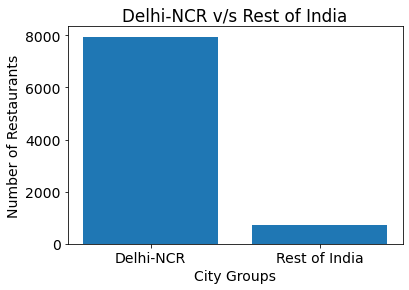

In [140]:
# Plotting Bar Graph

Cities = ['Delhi-NCR','Rest of India']
count = [c1,c2]
print("Cities in Delhi NCR:",c1," Cities in Rest of India:",c2)
plt.bar(Cities,count,width = 0.8)
plt.xlabel('City Groups')
plt.ylabel('Number of Restaurants')
plt.title('Delhi-NCR v/s Rest of India')
plt.show()

## 1.3

In [12]:
# Checking absent cuisines

# Creating unqie cuisines for Delhi ncr region
def splitting(string):
    string = str(string)
    string = string.strip()
    words = string.strip().split(',')
    lst = []
    for word in words:
        word = word.strip()
        lst.append(word)
    return lst

df_ncr['Cuisines'] = df_ncr['Cuisines'].apply(splitting)

cuisines = list(df_ncr['Cuisines'])
d_ncr = {}
for i in cuisines:
    for j in i:
        if j in d_ncr:
            d_ncr[j] += 1
        else:
            d_ncr[j] = 1
            
ncr_cusines = list(d_ncr.keys())

# Creating unqie cuisines for Rest of india region
def splitting(string):
    string = str(string)
    string = string.strip()
    words = string.strip().split(',')
    lst = []
    for word in words:
        word = word.strip()
        lst.append(word)
    return lst

df_row['Cuisines'] = df_row['Cuisines'].apply(splitting)

cuisines = list(df_row['Cuisines'])
d_row = {}
for i in cuisines:
    for j in i:
        if j in d_row:
            d_row[j] += 1
        else:
            d_row[j] = 1
            
row_cusines = list(d_row.keys())

# Checking for absent values
absent = []
for cuisine in row_cusines:
    if cuisine not in ncr_cusines:
        absent.append(cuisine)
        
absent

['German', 'Malwani', 'BBQ', 'Cajun']

In [13]:
# Thus, these are the cuisines not available in Delhi NCR region 

In [14]:
# Checking on Zomato API

# LatLong info about 
# Delhi: Lat = 28.704060 long = 77.102493
# Noida: Lat = 28.535517 long = 77.391029
# Ghaziabad: Lat = 28.711241 Long = 77.4445372
# Gurgaon: Lat = 28.4282624 Long = 77.0027001
# Faridabad: Lat = 28.402837 Long = 77.3085626

cuisines_api = {}

# For Delhi
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers = { 'user-key': '8be48719ebad8da1d2d0378e9bf65f0c'},
                   params ={'lat':28.704060 ,'lon':77.102493 })
res = res.json()
data = res['cuisines']
for ele in data:
    cuisine = ele['cuisine']['cuisine_name']
    if cuisine in cuisines_api:
        cuisines_api[cuisine] += 1
    else:
        cuisines_api[cuisine] = 1

# For Noida
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers = { 'user-key': '8be48719ebad8da1d2d0378e9bf65f0c'},
                   params ={'lat':28.535517 ,'lon':77.391029 })
res = res.json()
data = res['cuisines']
for ele in data:
    cuisine = ele['cuisine']['cuisine_name']
    if cuisine in cuisines_api:
        cuisines_api[cuisine] += 1
    else:
        cuisines_api[cuisine] = 1
        
# For Ghaziabad
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers = { 'user-key': '8be48719ebad8da1d2d0378e9bf65f0c'},
                   params ={'lat':28.711241 ,'lon':77.4445372 })
res = res.json()
data = res['cuisines']
for ele in data:
    cuisine = ele['cuisine']['cuisine_name']
    if cuisine in cuisines_api:
        cuisines_api[cuisine] += 1
    else:
        cuisines_api[cuisine] = 1
        
        
# For Gurgoan
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers = { 'user-key': '8be48719ebad8da1d2d0378e9bf65f0c'},
                   params ={'lat':28.4282624 ,'lon':77.0027001 })
res = res.json()
data = res['cuisines']
for ele in data:
    cuisine = ele['cuisine']['cuisine_name']
    if cuisine in cuisines_api:
        cuisines_api[cuisine] += 1
    else:
        cuisines_api[cuisine] = 1
    
# For Faridabad
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers = { 'user-key': '8be48719ebad8da1d2d0378e9bf65f0c'},
                   params ={'lat':28.402837 ,'lon':77.3085626 })
res = res.json()
data = res['cuisines']
for ele in data:
    cuisine = ele['cuisine']['cuisine_name']
    if cuisine in cuisines_api:
        cuisines_api[cuisine] += 1
    else:
        cuisines_api[cuisine] = 1
 
api_list = list(cuisines_api.keys())

# Comparing our list absent to api_list
for ele in absent:
    print(ele,end=' ')
    if ele in api_list:
        print(": Error in dataset given")
    else:
        print(": Absent in the Delhi - NCR Region")

German : Absent in the Delhi - NCR Region
Malwani : Error in dataset given
BBQ : Error in dataset given
Cajun : Absent in the Delhi - NCR Region


## 1.4

In [15]:
# Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [35]:
# Splitting the cuisines column
def splitting(string):
    string = str(string)
    string = string.strip()
    words = string.strip().split(',')
    lst = []
    for word in words:
        word = word.strip()
        lst.append(word)
    return lst

df['Cuisines'] = df['Cuisines'].apply(splitting)

df = df.explode('Cuisines')
a = df['Cuisines'].value_counts()
names = list(a.index)
number = list(a)
for i in range(10):
    print(i+1,'. ','Cuisine name:',names[i],'\t','Number of restuarants:',number[i])

1 .  Cuisine name: North Indian 	 Number of restuarants: 3946
2 .  Cuisine name: Chinese 	 Number of restuarants: 2690
3 .  Cuisine name: Fast Food 	 Number of restuarants: 1963
4 .  Cuisine name: Mughlai 	 Number of restuarants: 992
5 .  Cuisine name: Bakery 	 Number of restuarants: 726
6 .  Cuisine name: Continental 	 Number of restuarants: 724
7 .  Cuisine name: Italian 	 Number of restuarants: 682
8 .  Cuisine name: South Indian 	 Number of restuarants: 631
9 .  Cuisine name: Cafe 	 Number of restuarants: 627
10 .  Cuisine name: Desserts 	 Number of restuarants: 597


## 1.5

In [21]:
# Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India.
# Plot the suitable graph to explain your inference.

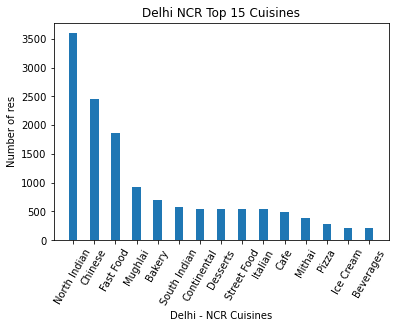

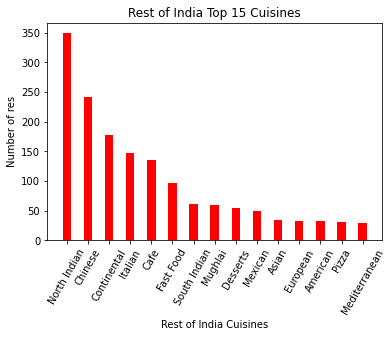

Ignoring the fact that data is majorly skewed towards Delhi NCR region
We can see that North Indian Cuisine in Delhi - NCR region is a major hit and almost every restuarant has North Indian
The count decreases as Chinese and intercontinental is preffered in rest of India whereas chinese and Fast Food is common in Delhi - NCR
In Delhi - NCR region, bakery is a cuisine enjoyed more as compared to ROI
Mughlai, Mexican and Asian Cuisine is preffered more since more restaurants are serving these as compared to ROI


In [57]:
import operator
sorted_ncr = dict(sorted(d_ncr.items(), key=operator.itemgetter(1),reverse=True))
sorted_row = dict(sorted(d_row.items(), key=operator.itemgetter(1),reverse=True))

top_15_counts_ncr = list(sorted_ncr.values())[:15]
top_15_cuisines_ncr = list(sorted_ncr.keys())[:15]

top_15_counts_row = list(sorted_row.values())[:15]
top_15_cuisines_row = list(sorted_row.keys())[:15]

plt.bar(top_15_cuisines_ncr,top_15_counts_ncr,width=0.4)
plt.xlabel("Delhi - NCR Cuisines")
plt.ylabel("Number of res")
plt.title("Delhi NCR Top 15 Cuisines")
plt.xticks(rotation = 60)
plt.show()

plt.bar(top_15_cuisines_row,top_15_counts_row,width=0.4,color = 'red')
plt.xlabel("Rest of India Cuisines")
plt.ylabel("Number of res")
plt.title("Rest of India Top 15 Cuisines")
plt.xticks(rotation = 60)
plt.show()

print('''Ignoring the fact that data is majorly skewed towards Delhi NCR region
We can see that North Indian Cuisine in Delhi - NCR region is a major hit and almost every restuarant has North Indian
The count decreases as Chinese and intercontinental is preffered in rest of India whereas chinese and Fast Food is common in Delhi - NCR
In Delhi - NCR region, bakery is a cuisine enjoyed more as compared to ROI
Mughlai, Mexican and Asian Cuisine is preffered more since more restaurants are serving these as compared to ROI''')

# ----------------------------------------------------------------------------------------------------------

# Question 2

User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

1. Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

    1. Number of Votes given Restaurant

    2. Restaurant serving more number of cuisines.

    3. Average Cost of Restaurant

    4. Restaurant serving some specific cuisines.

2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating? Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [85]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,8.652000e+03,8652.0,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,8.657085e+06,1.0,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552
std,8.959437e+06,0.0,18.017536,6.976576,595.676124,0.852544,1.510986,428.039513
min,5.300000e+01,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.007402e+05,1.0,77.098797,28.491425,300.000000,1.000000,2.100000,4.000000
50%,2.200006e+06,1.0,77.203468,28.569869,450.000000,2.000000,3.100000,24.000000
75%,1.836120e+07,1.0,77.285356,28.637857,700.000000,2.000000,3.600000,100.000000
max,1.850065e+07,1.0,91.806493,35.000000,8000.000000,4.000000,4.900000,10934.000000


In [2]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71


### 2.1.1 Rating v/s number of votes given

In [37]:
df_21 = df[['Restaurant Name','Aggregate rating','Votes']]
df_21.head()

,Restaurant Name,Aggregate rating,Votes
728,Toit,4.8,10934
735,Truffles,4.7,9667
3994,Hauz Khas Social,4.3,7931
2412,Peter Cat,4.3,7574
739,AB's - Absolute Barbecues,4.6,6907


In [38]:
df_21.sort_values(['Votes'],ascending=False,inplace=True)

In [39]:
df_21.head()

,Restaurant Name,Aggregate rating,Votes
728,Toit,4.8,10934
735,Truffles,4.7,9667
3994,Hauz Khas Social,4.3,7931
2412,Peter Cat,4.3,7574
739,AB's - Absolute Barbecues,4.6,6907


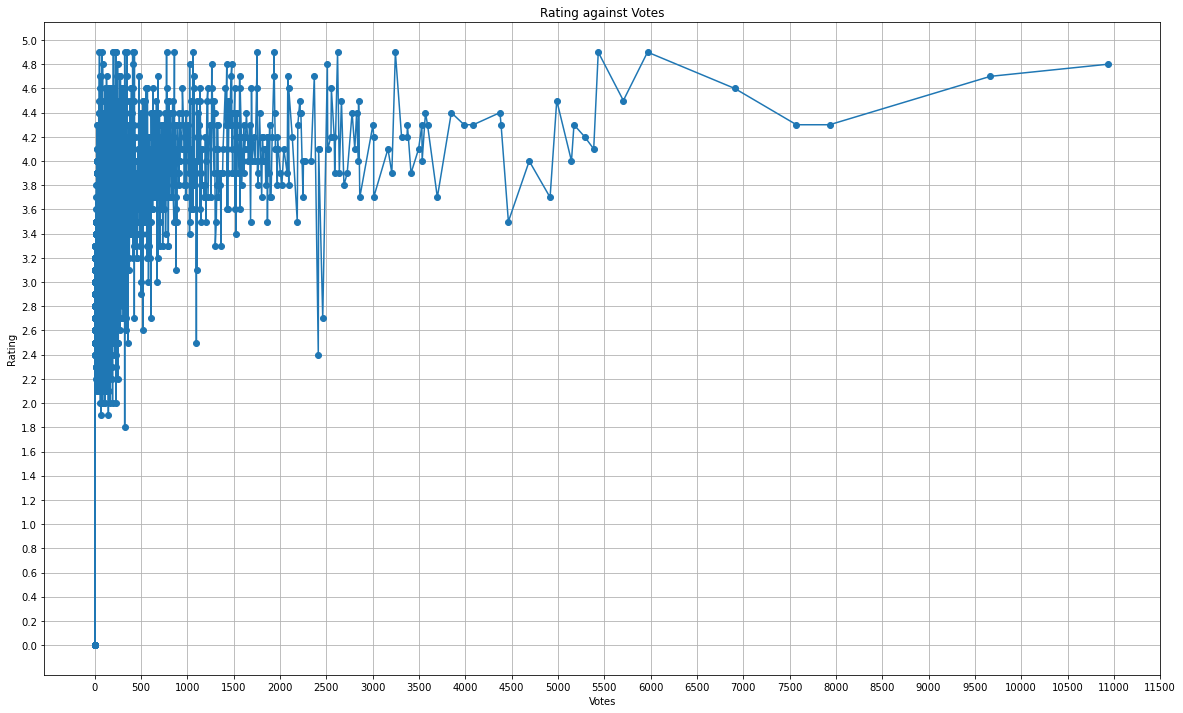


As We can See, restaurants having more than 4000 votes tend to have a rating above 3.4 - 3.6
But restuarants below 4000 votes tend to have their rating varied ranging from 2.2 to even 5
Thus Votes do not affect directly the rating but having more votes means a steady quality of service
Whereas having less votes implies having a rough service or mid-range satisfaction.



In [40]:
votes = list(df_21['Votes'])
rating = list(df_21['Aggregate rating'])
plt.figure(figsize=(20,12))
plt.plot(votes,rating,'o-')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Rating against Votes')
plt.xticks(np.arange(0,12000,500))
plt.yticks(np.arange(0,5.2,0.2))
plt.grid()
plt.show()

print('''
As We can See, restaurants having more than 4000 votes tend to have a rating above 3.4 - 3.6
But restuarants below 4000 votes tend to have their rating varied ranging from 2.2 to even 5
Thus Votes do not affect directly the rating but having more votes means a steady quality of service
Whereas having less votes implies having a rough service or mid-range satisfaction.
''')

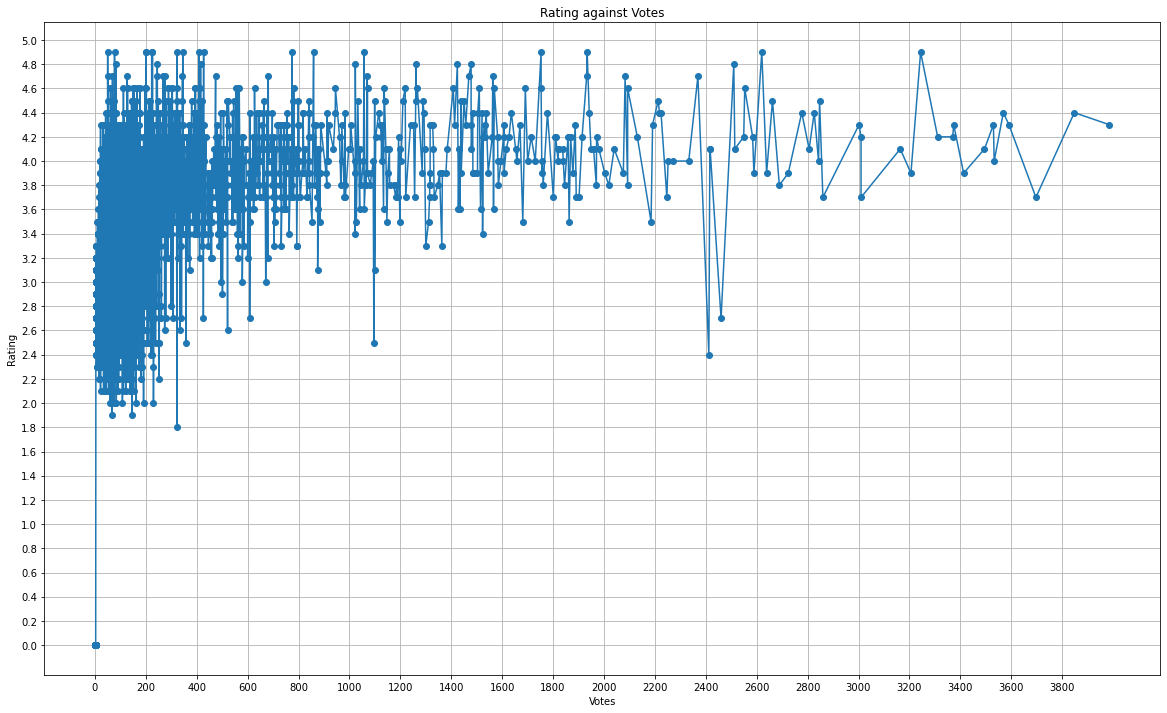


On Further analysis, in votes below 4000, votes below 800 are majorly disrupted amongst the 2-3 rating range
Restuarants must focus on getting their vote count up



In [42]:
# Having a closer look at votes below 4000
df_21 = df_21[df_21['Votes'] < 4000]
votes = list(df_21['Votes'])
rating = list(df_21['Aggregate rating'])
plt.figure(figsize=(20,12))
plt.plot(votes,rating,'o-')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Rating against Votes')
plt.xticks(np.arange(0,4000,200))
plt.yticks(np.arange(0,5.2,0.2))
plt.grid()
plt.show()


print('''
On Further analysis, in votes below 4000, votes below 800 are majorly disrupted amongst the 2-3 rating range
Restuarants must focus on getting their vote count up
''')

### 2.1.2 Rating v/s Multiple cuisine restaurant

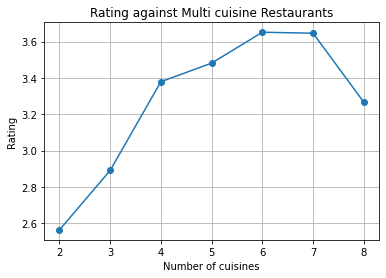


As we can see, the aggregate factor is selected as mean of ratings
As the number of cuisines increases, the rating also increases but starts to decrease when #of cuisines is 8.
It can be inferred that 7 Cuisine options hits the sweet spot of achieving ratings



In [117]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]

def splitting(string):
    string = str(string)
    string = string.strip()
    words = string.strip().split(',')
    a = len(words)
    if a > 1:
        return a
    else:
        val = 'ABC'
        return val

df['Cuisines'] = df['Cuisines'].apply(splitting)

df22 = df.copy()
df22 = df22[df22['Cuisines'] != 'ABC']
df22 = df22[['Cuisines','Aggregate rating']]
ans = df22.groupby('Cuisines')['Aggregate rating'].mean()
num = list(ans.index)
rating = list(ans)

plt.plot(num,rating,'o-')
plt.grid()
plt.xlabel("Number of cuisines")
plt.ylabel("Rating")
plt.title("Rating against Multi cuisine Restaurants")
plt.show()

print('''
As we can see, the aggregate factor is selected as mean of ratings
As the number of cuisines increases, the rating also increases but starts to decrease when #of cuisines is 8.
It can be inferred that 7 Cuisine options hits the sweet spot of achieving ratings
''')

### 2.1.3 Rating vs Avg cost of restaurant

In [152]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]
df = df[['Average Cost for two','Aggregate rating']]
cost = list(df['Average Cost for two'])
rate = list(df['Aggregate rating'])
plt.figure(figsize=(20,12))
plt.scatter(cost,rate,color = 'black')
plt.xlabel('Average cost for 2')
plt.ylabel('Rating')
plt.title('Rating against Average cost for 2')
plt.yticks(np.arange(0,5.2,0.2))
plt.grid()
plt.rcParams['figure.dpi'] = 600
plt.show()

print('''
As we can see from plot, its clearly visible that maximum rating is achieved when cost for two is between 0-2000
above 2000, very few Ratings have been given and that also in a varied manner from 2-5
Restaurants having cost for 2 between 0-1000 are however uniformly distributed between rating 2 and 5
This infers that along with cost for 2, Quality of service is uniformly varying
''')


As we can see from plot, its clearly visible that maximum rating is achieved when cost for two is between 0-2000
above 2000, very few Ratings have been given and that also in a varied manner from 2-5
Restaurants having cost for 2 between 0-1000 are however uniformly distributed between rating 2 and 5
This infers that along with cost for 2, Quality of service is uniformly varying



### 2.1.4 Restaurant serving some specific cuisines.

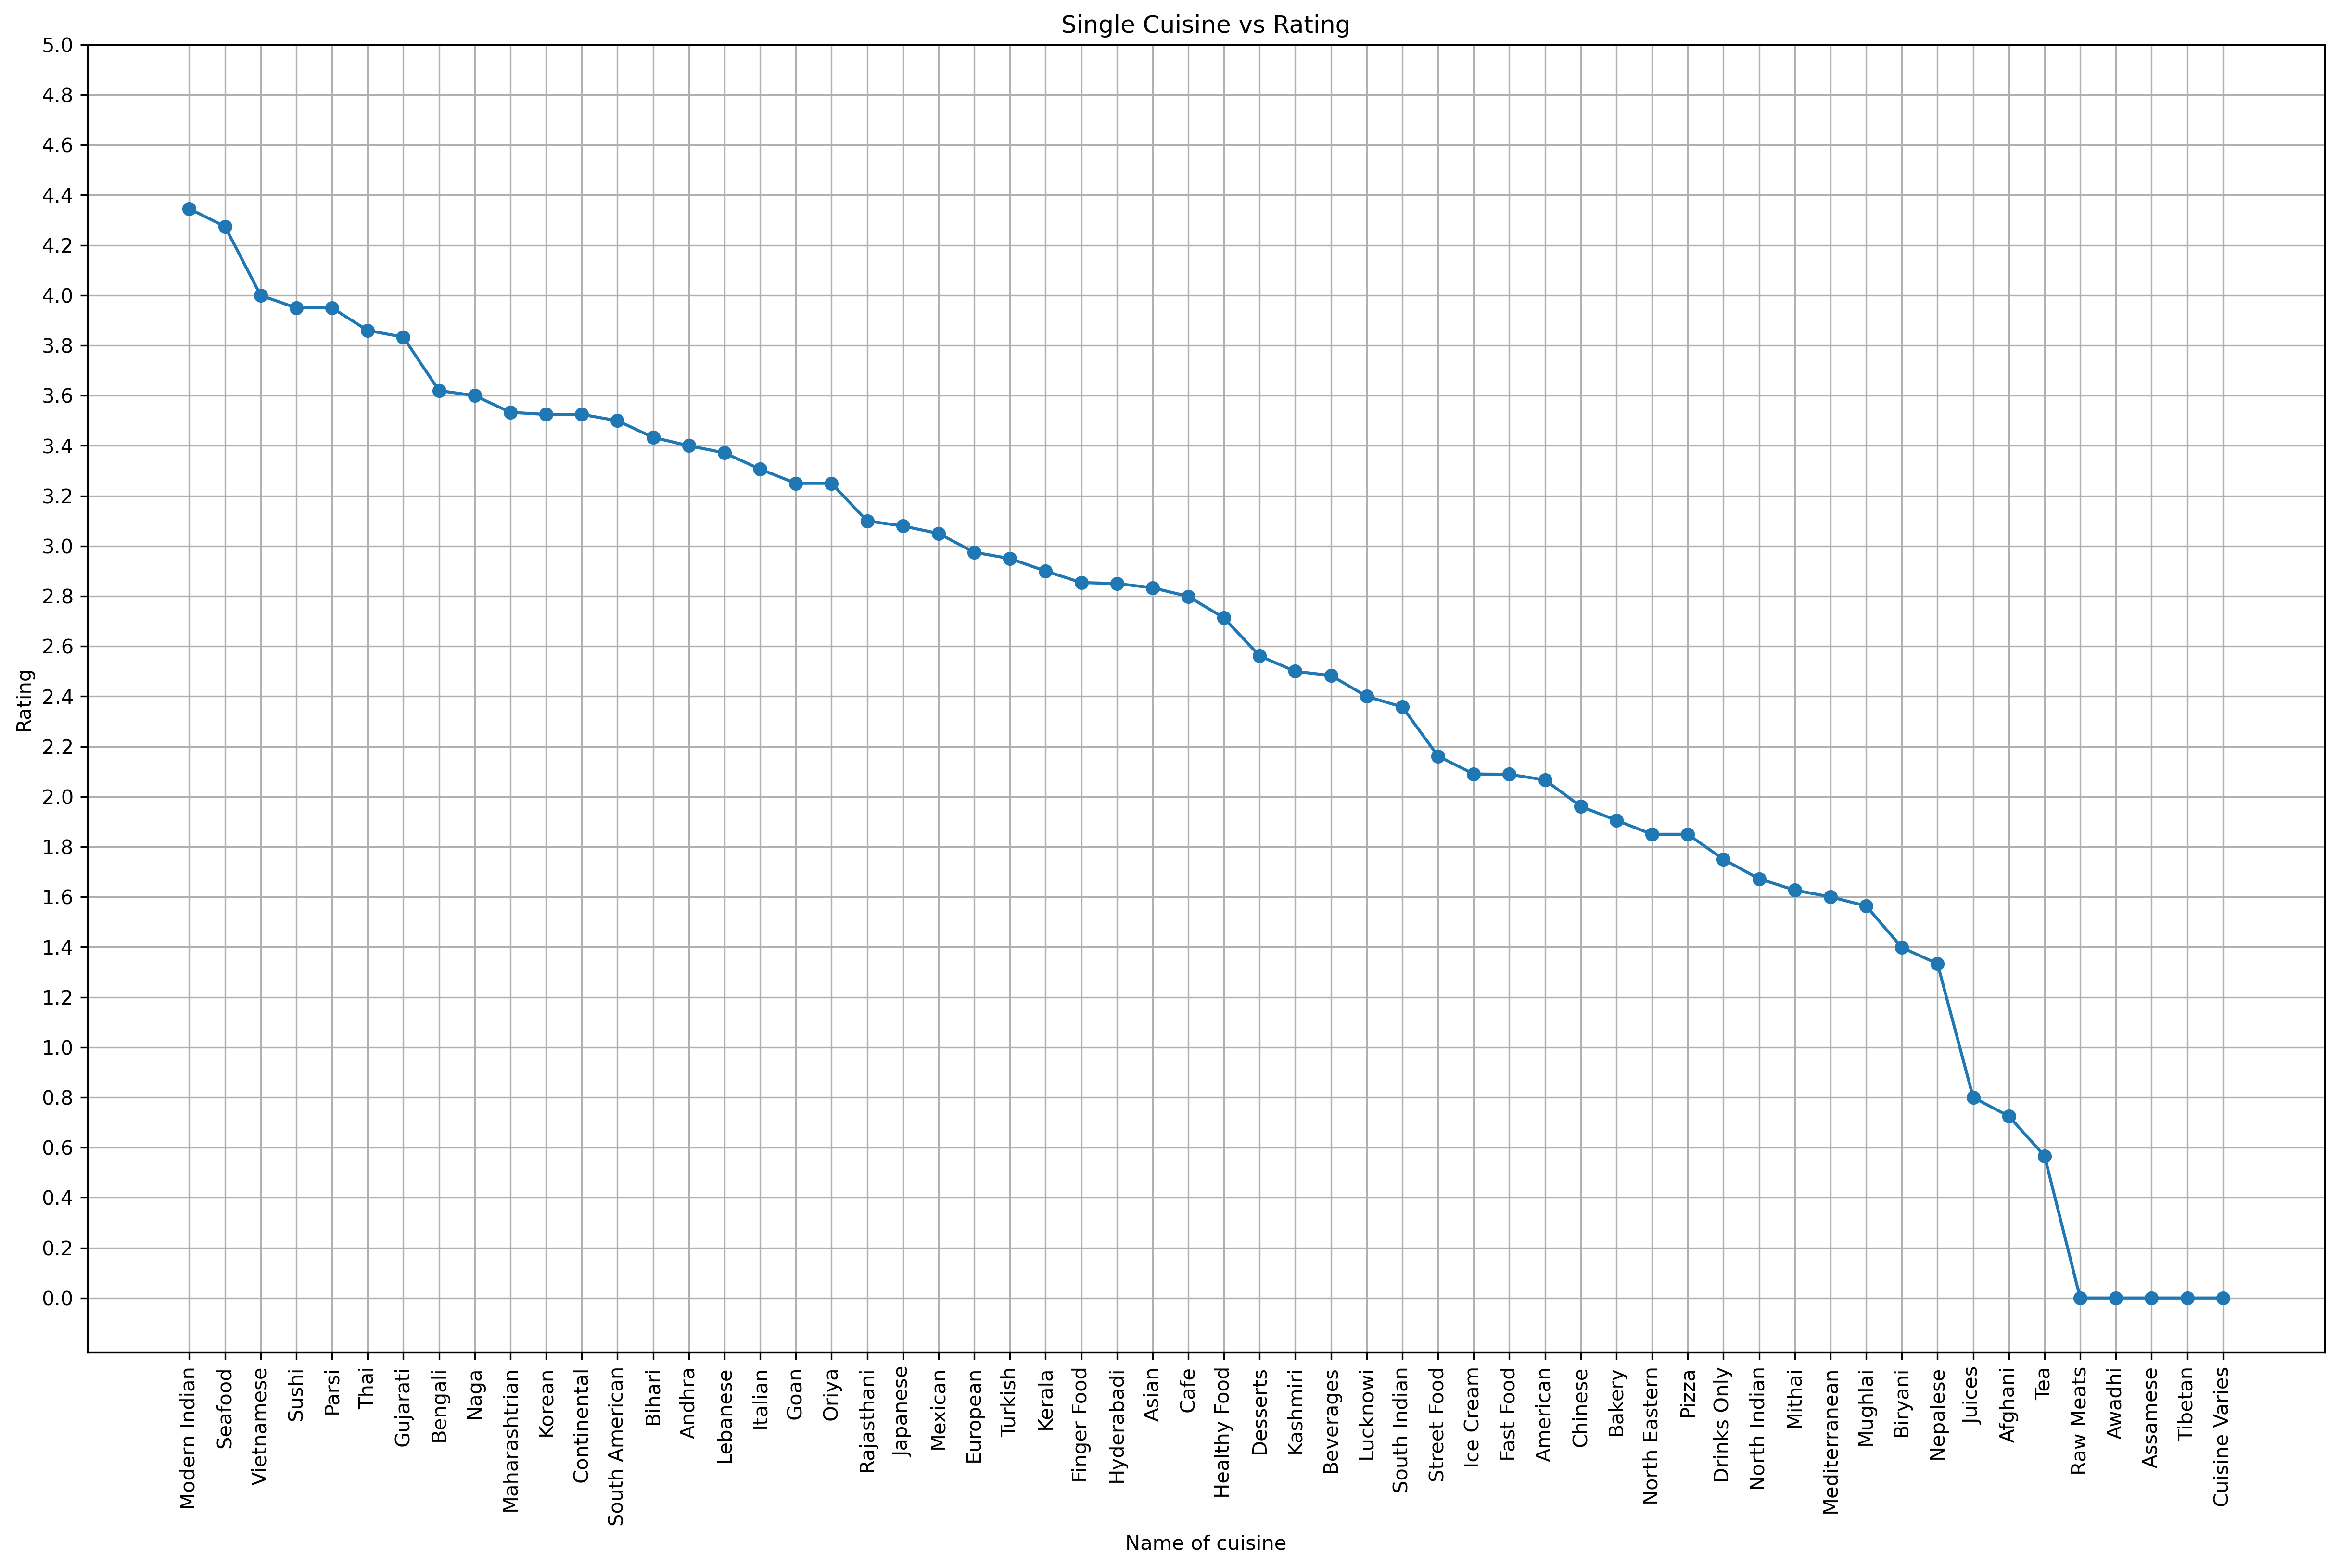


Conclusion: Cuisines such as Modern Indian, Seafood, vietnamese, etc recieved on an average higher ratings than 
restaurants serving just Juices, Biryani, Pizza, etc
As there is a steady decline between the cuisines, the mindset of ratings decreases as we serve just single cuisine food.



In [151]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]

def splitting(string):
    string = str(string)
    string = string.strip()
    words = string.strip().split(',')
    a = len(words)
    if a > 1:
        return 'ABC'
    else:
        return string

df['Cuisines'] = df['Cuisines'].apply(splitting)

df = df[df['Cuisines'] != 'ABC']
df = df[['Cuisines', 'Aggregate rating']]
ans = df.groupby(['Cuisines'])['Aggregate rating'].mean()
ans.sort_values(inplace = True,ascending=False)
names = list(ans.index)
rate = list(ans)

plt.figure(figsize=(20,12))
plt.plot(names,rate,'o-')
plt.xlabel("Name of cuisine")
plt.ylabel("Rating")
plt.title("Single Cuisine vs Rating")
plt.yticks(np.arange(0,5.2,0.2))
plt.xticks(rotation = 90)
plt.grid()
plt.rcParams['figure.dpi'] = 600
plt.show()

print('''
Conclusion: Cuisines such as Modern Indian, Seafood, vietnamese, etc recieved on an average higher ratings than 
restaurants serving just Juices, Biryani, Pizza, etc
As there is a steady decline between the cuisines, the mindset of ratings decreases as we serve just single cuisine food.
''')

### 2.2 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
    - Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) 

In [70]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]


df = df[['Locality', 'Aggregate rating', 'Votes']]
df.sort_values(['Locality'],ascending=True,inplace=True)
df['mul'] = df['Aggregate rating']*df['Votes']
df= df.groupby(['Locality']).sum()
df["weight"] = df['mul']/df['Votes']
#df.drop(['Aggregate rating'],axis=1)
df = df[['weight']]
df.sort_values(['weight'], ascending=False,inplace=True)

names = list(df.index)[:10]
weight = list(df['weight'])[:10]

for i in range(10):
    print(names[i], "%.3f" %weight[i])

Hotel Clarks Amer, Malviya Nagar 4.900
Aminabad 4.900
Friends Colony 4.887
Powai 4.842
Kirlampudi Layout 4.820
Deccan Gymkhana 4.800
Express Avenue Mall,  Royapettah 4.800
Banjara Hills 4.719
Sector 5, Salt Lake 4.707
Riverside Mall, Gomti Nagar 4.700


# Question 3

## Visualization
- Plot the bar graph top 15 restaurants have a maximum number of outlets.
- Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
- Plot the bar graph top 10 restaurants in the data with the highest number of votes.
- Plot the pie graph of top 10 cuisines present in restaurants in the USA.
- Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

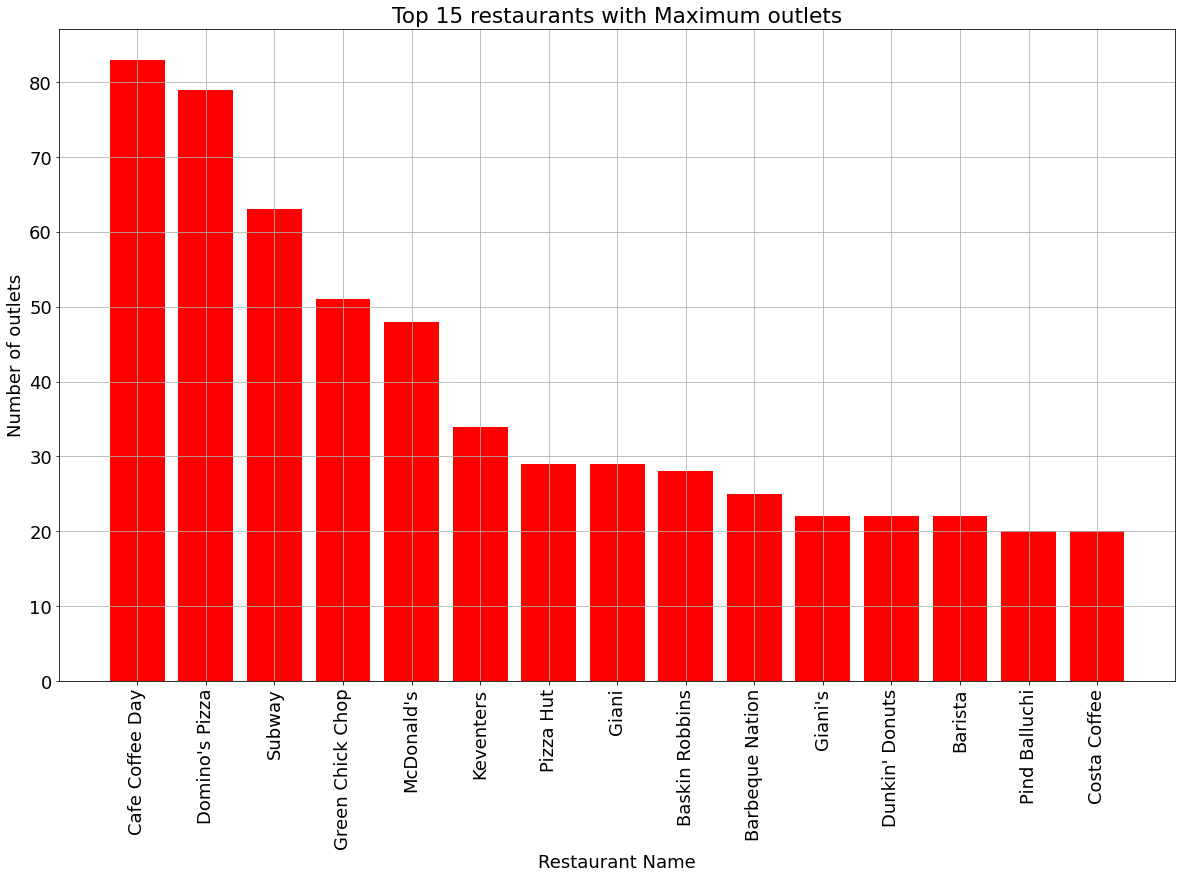

In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]

a = df['Restaurant Name'].value_counts()
names = list(a.index)[:15]
count = list(a)[:15]

plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size': 18})
plt.bar(names,count,width=0.8,color='red')
plt.grid()
plt.xlabel("Restaurant Name")
plt.xticks(rotation = 90)
plt.ylabel("Number of outlets")
plt.title("Top 15 restaurants with Maximum outlets")
plt.show()

# ----------------------------------------------------------------------------------------------------------

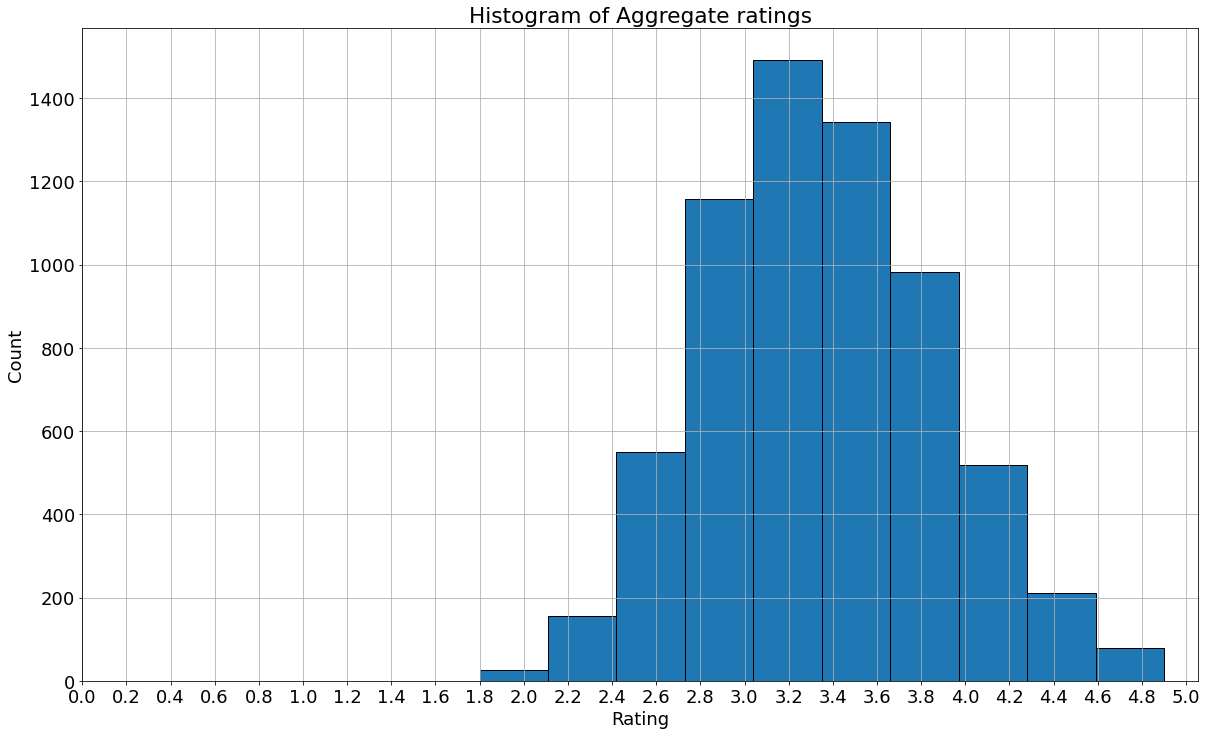

In [31]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]


df = df[df['Aggregate rating'] != 0.0]
data = list(df['Aggregate rating'])
plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size': 18})
plt.hist(data,edgecolor = 'black')
plt.xticks(np.arange(0,5.2,0.2))
plt.xlabel("Rating")
plt.ylabel('Count')
plt.title("Histogram of Aggregate ratings")
plt.grid()
plt.show()

# -------------------------------------------------------------------------------------------------

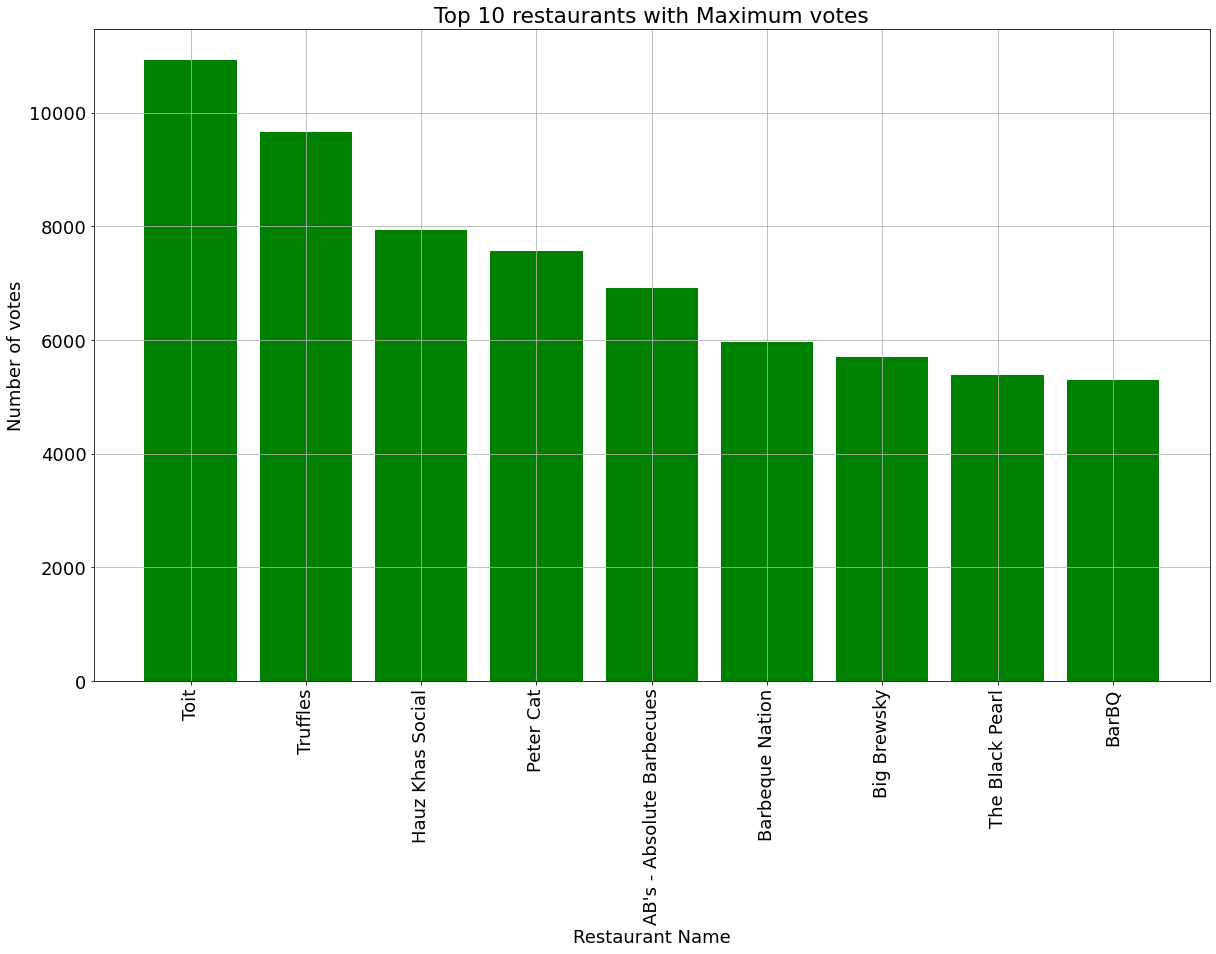

In [41]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]

df = df[['Restaurant Name','Votes']]
df.sort_values(['Votes'], ascending=False ,inplace=True)
names = list(df['Restaurant Name'])[:10]
count = list(df['Votes'])[:10]

plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size': 18})
plt.bar(names,count,width=0.8,color='green')
plt.grid()
plt.xlabel("Restaurant Name")
plt.xticks(rotation = 90)
plt.ylabel("Number of votes")
plt.title("Top 10 restaurants with Maximum votes")
plt.show()

# -----------------------------------------------------------------------------------------------

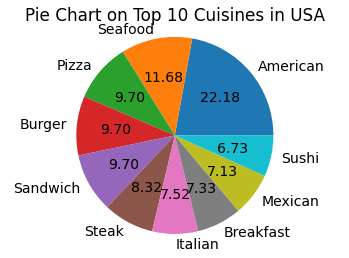

In [65]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 216]


def splitting(string):
    string = str(string)
    string = string.strip()
    words = string.strip().split(',')
    lst = []
    for word in words:
        word = word.strip()
        lst.append(word)
    return lst

df['Cuisines'] = df['Cuisines'].apply(splitting)

df = df.explode('Cuisines')

a = df['Cuisines'].value_counts()
names = list(a.index)[:10]
count = list(a)[:10]
plt.rcParams.update({'font.size': 14})
plt.pie(count,labels = names,autopct="%.2f")
plt.axis('equal')
plt.title("Pie Chart on Top 10 Cuisines in USA")
plt.show()

# ----------------------------------------------------------------------------------------------------------

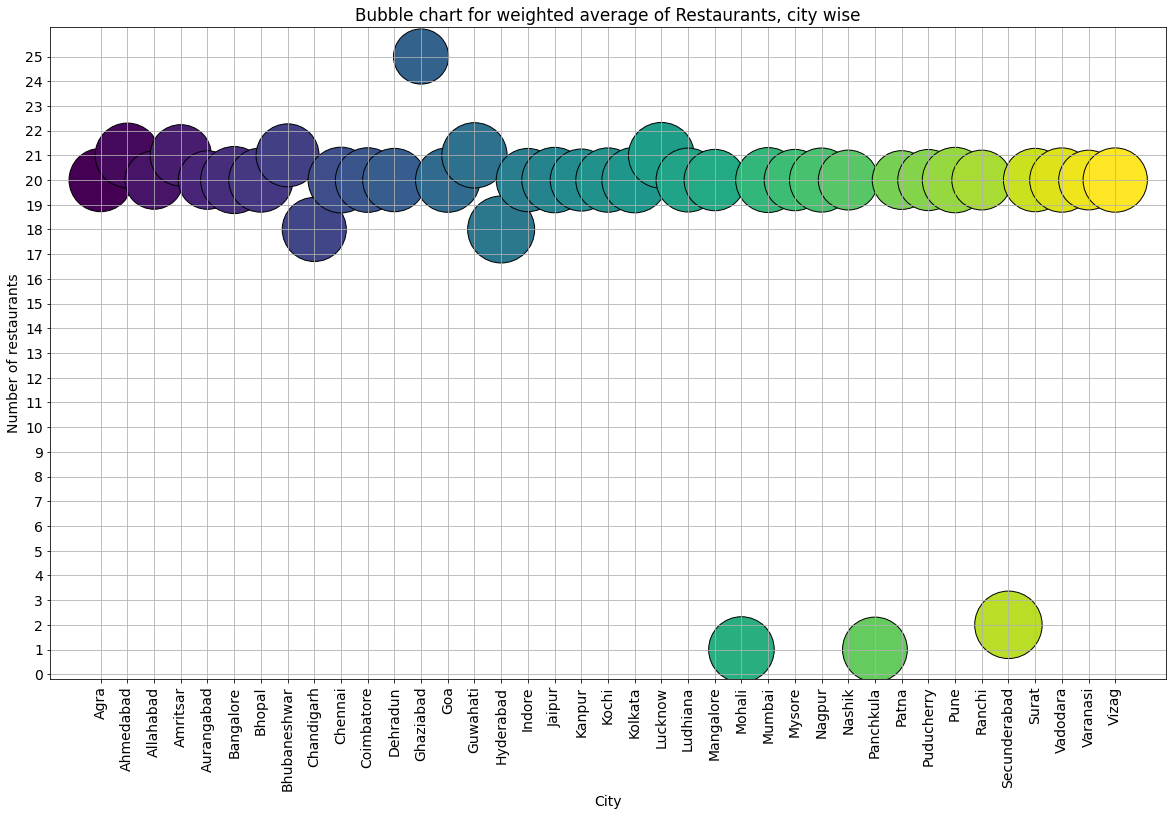

In [126]:
# Plot the bubble graph of a number of Restaurants present in the city of India
# and keeping the weighted restaurant rating of the city in a bubble.

df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]
# Excluding Delhi NCR
df = df[(df['City'] != 'New Delhi') & (df['City'] != 'Gurgaon') & (df['City'] != 'Noida') & (df['City'] != 'Faridabad')]
a = df['City'].value_counts()
a.sort_index(ascending=True,inplace=True)
total = list(a)

df = df[['City', 'Aggregate rating', 'Votes']]
df.sort_values(['City'],ascending=True,inplace=True)
df['mul'] = df['Aggregate rating']*df['Votes']
df= df.groupby(['City']).sum()
df["weight"] = df['mul']/df['Votes']
#df.drop(['Aggregate rating'],axis=1)
df = df[['weight']]
#df.sort_values(['weight'], ascending=False,inplace=True)

names = list(df.index)
weight = list(df['weight'])
weights = []
for i in weight:
    val = i*1000
    weights.append(val)
   
    
    
plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size':14})
plt.scatter(names,total,s=weights,
            c = np.arange(len(names)),edgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel("City")
plt.ylabel("Number of restaurants")
plt.title("Bubble chart for weighted average of Restaurants, city wise")
plt.yticks(np.arange(0,26,1))
plt.grid()
plt.show()



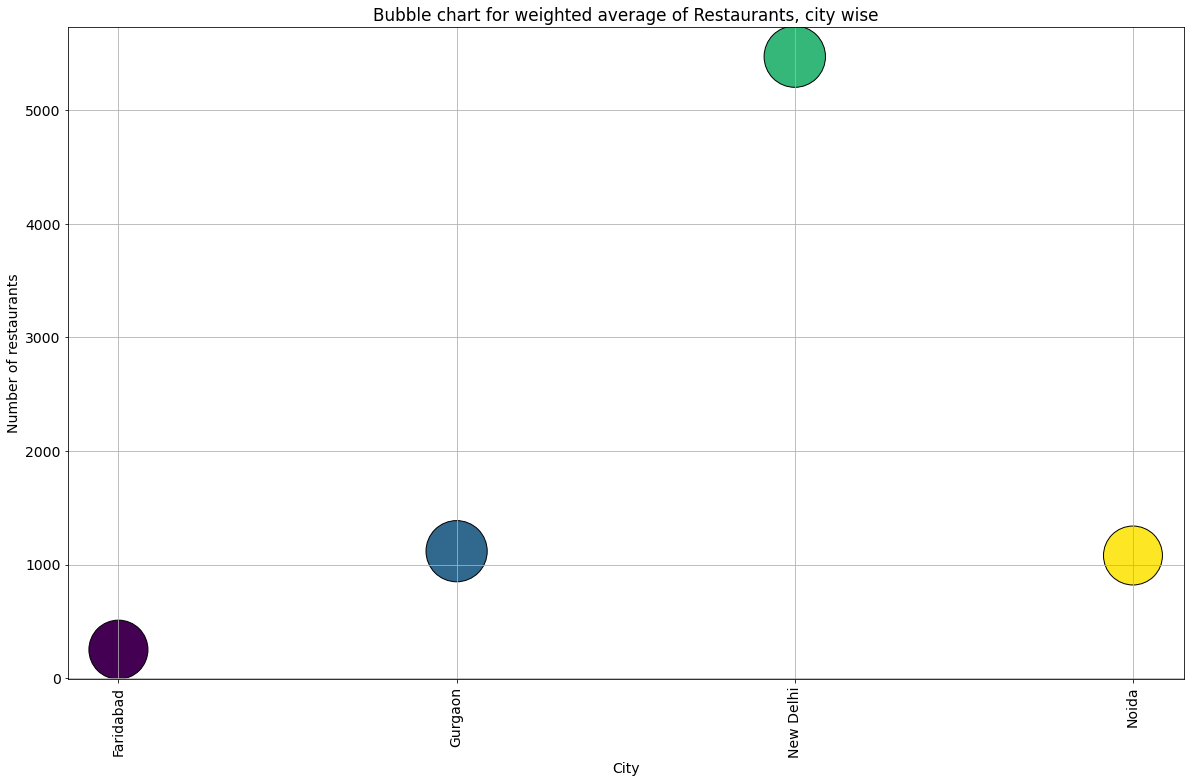

In [130]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

# Considering only Indian Restaurants with Country_code = 1
df = df[df['Country Code'] == 1]
# including Delhi NCR
df = df[(df['City'] == 'New Delhi') | (df['City'] == 'Gurgaon') | (df['City'] == 'Noida') | (df['City'] == 'Faridabad')]
a = df['City'].value_counts()
a.sort_index(ascending=True,inplace=True)
total = list(a)

df = df[['City', 'Aggregate rating', 'Votes']]
df.sort_values(['City'],ascending=True,inplace=True)
df['mul'] = df['Aggregate rating']*df['Votes']
df= df.groupby(['City']).sum()
df["weight"] = df['mul']/df['Votes']
#df.drop(['Aggregate rating'],axis=1)
df = df[['weight']]
#df.sort_values(['weight'], ascending=False,inplace=True)

names = list(df.index)
weight = list(df['weight'])
weights = []
for i in weight:
    val = i*1000
    weights.append(val)
   
    
    
plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size':14})
plt.scatter(names,total,s=weights,
            c = np.arange(len(names)),edgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel("City")
plt.ylabel("Number of restaurants")
plt.title("Bubble chart for weighted average of Restaurants, city wise")
plt.grid()
plt.show()
